<a href="https://colab.research.google.com/github/krishnadixit05/Mall-Customer-Segmentation/blob/main/Hierarchial_Clustering_and_DBSCAN(AI_pr).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Hierarchial Clustering and DBSCAN Implementations

In [ ]:
import numpy as np
import pandas as pd
from pandas import plotting
import matplotlib.pyplot as plt
import seaborn as sns
=
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
plt.style.use('fivethirtyeight')

In [ ]:
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff


import seaborn as sns
plt.style.use('ggplot')

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
import missingno as msno
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

#clustering model library
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
# importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')

In [ ]:
dataset.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [ ]:
dataset.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [ ]:
dataset.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
dataset.head(3)


,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Score       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 17.5+ KB


In [ ]:
print('This dataset contains ',dataset.shape[0],'rows')
print('This dataset contains ',dataset.shape[1],'columns')

This dataset contains  200 rows
This dataset contains  5 columns


In [ ]:
numerical_features = dataset.select_dtypes(include=['number'])
correlation_matrix = numerical_features.corr()
print(correlation_matrix)

            CustomerID       Age    Income     Score
CustomerID    1.000000 -0.026763  0.977548  0.013835
Age          -0.026763  1.000000 -0.012398 -0.327227
Income        0.977548 -0.012398  1.000000  0.009903
Score         0.013835 -0.327227  0.009903  1.000000


In [ ]:
# Dropping the Customer ID Column
dataset.drop('CustomerID',axis=1,inplace=True)

In [ ]:
print("Mean of Annual Income (k$) of Female:",dataset['Income'].loc[dataset['Gender'] == 'Female'].mean())
print("Mean of Annual Income (k$) of Male:",dataset['Income'].loc[dataset['Gender'] == 'Male'].mean())

Mean of Annual Income (k$) of Female: 59.25
Mean of Annual Income (k$) of Male: 62.22727272727273


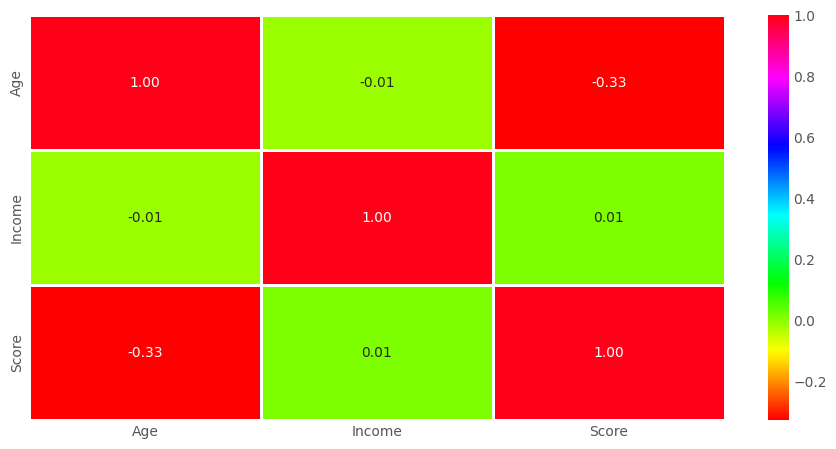

In [ ]:
plt.figure(figsize=(10,5))
numerical_features = dataset.select_dtypes(include=['number'])
sns.heatmap(numerical_features.corr(), annot=True, cmap='hsv', fmt='.2f', linewidths=2)
plt.show()

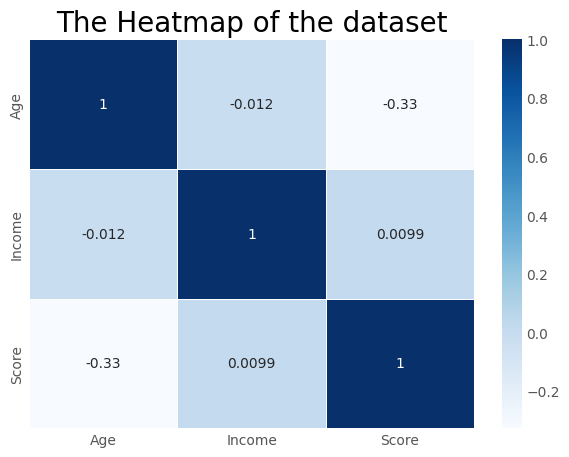

In [ ]:
hm=sns.heatmap(dataset.iloc[:,1:5].corr(), annot = True, linewidths=.5, cmap='Blues')
hm.set_title(label='The Heatmap of the dataset', fontsize=20)
hm
plt.ioff()

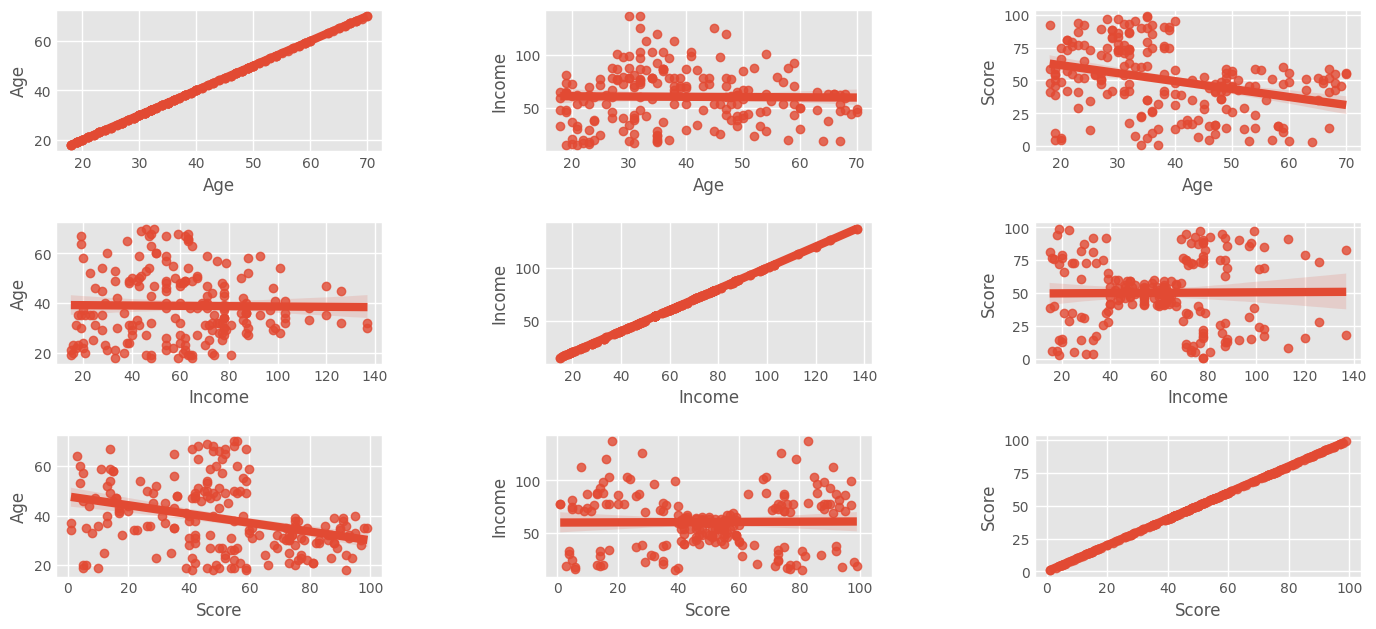

In [ ]:
plt.figure(1,figsize=(15,7))
n=0
for x in ['Age','Income','Score']:
    for y in ['Age','Income','Score']:
        n+=1
        plt.subplot(3,3,n)
        plt.subplots_adjust(hspace=0.5,wspace=0.5)
        sns.regplot(x=x,y=y,data=dataset)
        plt.ylabel(y.split()[0]+''+y.split()[1] if len(y.split())>1 else y)
plt.show()

In [ ]:
dataset.groupby('Gender').mean()

,Age,Income,Score
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [ ]:
###Checking for duplicates

print(sum(dataset.duplicated()))
dataset = dataset.drop_duplicates()

0


In [ ]:
##Exploring the Age Column for Further Analysis

dataset.Age.unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

In [ ]:
print(len(dataset.Age.unique()))

51


In [ ]:
dataset.Age.value_counts()[:10]

,count
Age,
32,11
35,9
31,8
19,8
30,7
49,7
23,6
40,6
36,6


In [ ]:
dataset['Age'].describe()

,Age
count,200.000000
mean,38.850000
std,13.969007
min,18.000000
25%,28.750000
50%,36.000000
75%,49.000000
max,70.000000


Creating an Age Range Category

In [ ]:
# Creating new category
bins = [18, 25, 50, 100]
labels = ['Young', 'Adult', 'Senior']
dataset['Age Range'] = pd.cut(dataset['Age'], bins=bins, labels=labels, right=False)

dataset.head()

,Gender,Age,Income,Score,Age Range
0,Male,19,15,39,Young
1,Male,21,15,81,Young
2,Female,20,16,6,Young
3,Female,23,16,77,Young
4,Female,31,17,40,Adult


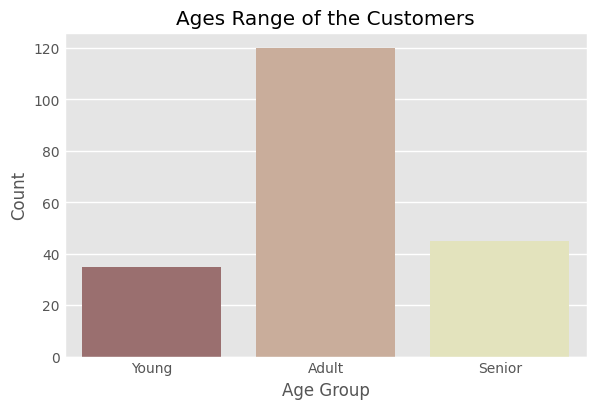

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=dataset['Age Range'], palette="pink")
plt.title('Ages Range of the Customers')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [ ]:
dataset.Age.value_counts()[:3]

,count
Age,
32,11
35,9
31,8


In [ ]:
AnnualIncome_32=0
AnnualIncome_35=0
AnnualIncome_19=0

AnnualIncome_32=sum(dataset[dataset['Age']==32].Income)
AnnualIncome_35=sum(dataset[dataset['Age']==35].Income)
AnnualIncome_19=sum(dataset[dataset['Age']==19].Income)

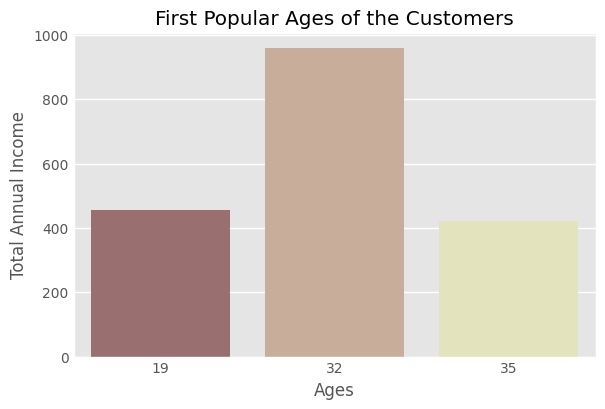

In [ ]:
Ages = ['19', '32', '35']
Total_AnnualIncomes = [AnnualIncome_19, AnnualIncome_32, AnnualIncome_35]


plt.figure(figsize=(6,4))
plt.title('First Popular Ages of the Customers')
sns.barplot(x=Ages, y=Total_AnnualIncomes, palette="pink")
plt.xlabel('Ages')
plt.ylabel('Total Annual Income')
plt.show()

Exploring the Gender Column

In [ ]:
dataset.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
dataset.Gender.value_counts()

,count
Gender,
Female,112
Male,88


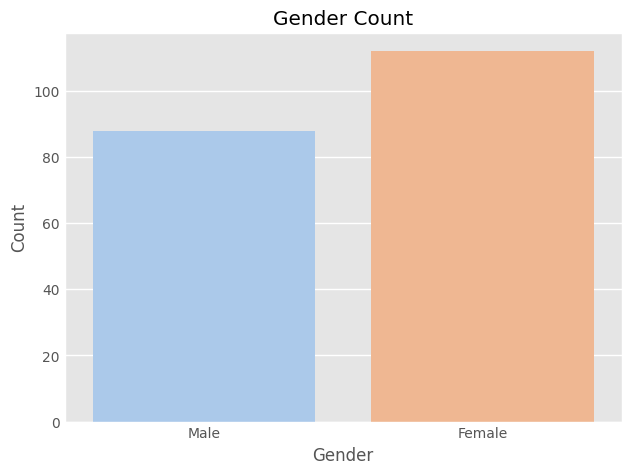

In [ ]:


custom_palette = "pastel"
sns.countplot(x='Gender', data=dataset, palette=custom_palette)

plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

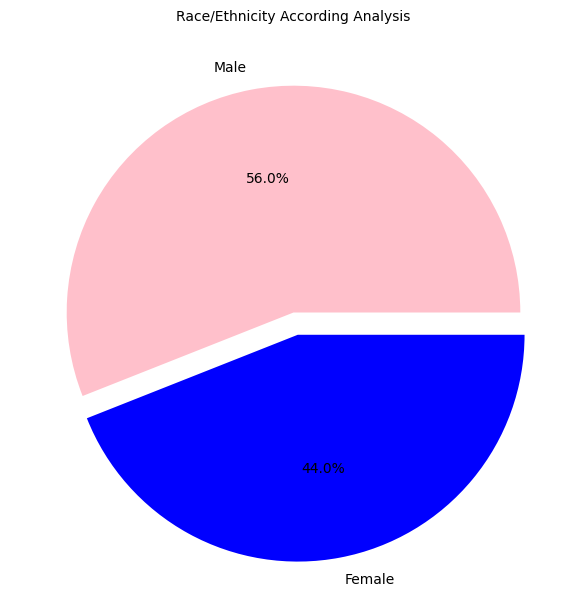

In [ ]:
labels=dataset.Gender.unique()
colors=['pink','blue']
explode=[0,0.1]
values=dataset.Gender.value_counts().values

#visualization
plt.figure(figsize=(7,7))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Race/Ethnicity According Analysis',color='black',fontsize=10)
plt.show()

In [ ]:
#Male Age
print('Max  :',max(dataset[dataset['Gender']=='Male'].Age))
print('Min  :',min(dataset[dataset['Gender']=='Male'].Age))
print('Mean :',np.mean(dataset[dataset['Gender']=='Male'].Age))
print('Std  :',np.std(dataset[dataset['Gender']=='Male'].Age))

Max  : 70
Min  : 18
Mean : 39.80681818181818
Std  : 15.426407372472942


In [ ]:
#Female Age
print('Max  :',max(dataset[dataset['Gender']=='Female'].Age))
print('Min  :',min(dataset[dataset['Gender']=='Female'].Age))
print('Mean :',np.mean(dataset[dataset['Gender']=='Female'].Age))
print('Std  :',np.std(dataset[dataset['Gender']=='Female'].Age))

Max  : 68
Min  : 18
Mean : 38.098214285714285
Std  : 12.587522039581053


Exploring the Annual Income Column for Further Analysis

In [ ]:
#Male Income
print('Max  :',max(dataset[dataset['Gender']=='Male'].Income))
print('Min  :',min(dataset[dataset['Gender']=='Male'].Income))
print('Mean :',np.mean(dataset[dataset['Gender']=='Male'].Income))
print('Std  :',np.std(dataset[dataset['Gender']=='Male'].Income))

Max  : 137
Min  : 15
Mean : 62.22727272727273
Std  : 26.486586344758496


In [ ]:
#Female Age
print('Max  :',max(dataset[dataset['Gender']=='Female'].Income))
print('Min  :',min(dataset[dataset['Gender']=='Female'].Income))
print('Mean :',np.mean(dataset[dataset['Gender']=='Female'].Income))
print('Std  :',np.std(dataset[dataset['Gender']=='Female'].Income))

Max  : 126
Min  : 16
Mean : 59.25
Std  : 25.8955663607278


In [ ]:
#Male SpendingScore
print('Max  :',max(dataset[dataset['Gender']=='Male'].Score))
print('Min  :',min(dataset[dataset['Gender']=='Male'].Score))
print('Mean :',np.mean(dataset[dataset['Gender']=='Male'].Score))
print('Std  :',np.std(dataset[dataset['Gender']=='Male'].Score))

Max  : 97
Min  : 1
Mean : 48.51136363636363
Std  : 27.737812359739767


In [ ]:
#Female SpendingScorem
print('Max  :',max(dataset[dataset['Gender']=='Female'].Score))
print('Min  :',min(dataset[dataset['Gender']=='Female'].Score))
print('Mean :',np.mean(dataset[dataset['Gender']=='Female'].Score))
print('Std  :',np.std(dataset[dataset['Gender']=='Female'].Score))

Max  : 99
Min  : 5
Mean : 51.526785714285715
Std  : 24.007052468801657


Decoding the Categorical Variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(dataset['Gender'].values)
dataset['Gender'] = integer_encoded
dataset.head(7)

,Gender,Age,Income,Score,Age Range
0,1,19,15,39,Young
1,1,21,15,81,Young
2,0,20,16,6,Young
3,0,23,16,77,Young
4,0,31,17,40,Adult
5,0,22,17,76,Young
6,0,35,18,6,Adult


Nunmerical Features Distribution

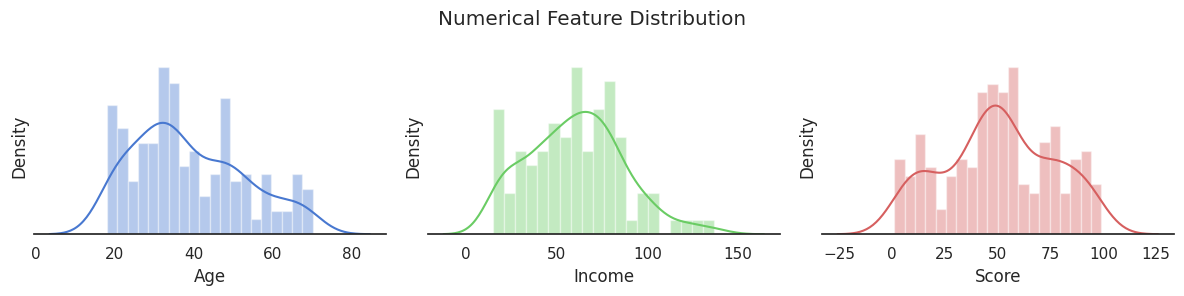

In [ ]:
# Numerical features distribution
sns.set(style='white', palette='muted', color_codes=True)
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.despine(left=True)
axs[0] = sns.distplot(dataset['Age'], bins=20, ax=axs[0])
axs[1] = sns.distplot(dataset['Income'], bins=20, ax=axs[1], color='g')
axs[2] = sns.distplot(dataset['Score'], bins=20, ax=axs[2], color='r')

fig.suptitle('Numerical Feature Distribution')
plt.setp(axs, yticks=[])
plt.tight_layout()
plt.show()


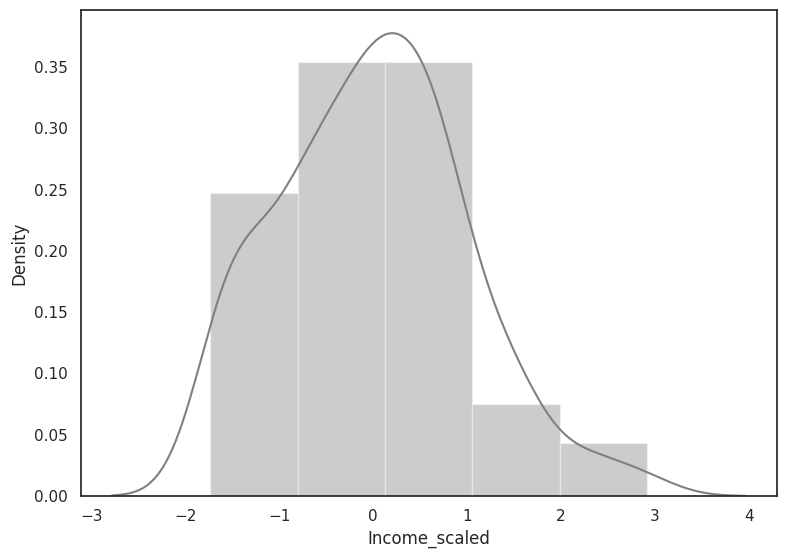

In [ ]:
plt.figure(figsize=(8,6))
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset['Income_scaled'] = scaler.fit_transform(dataset[['Income']])
sns.distplot(dataset['Income_scaled'], bins=5, color='gray')
plt.show()

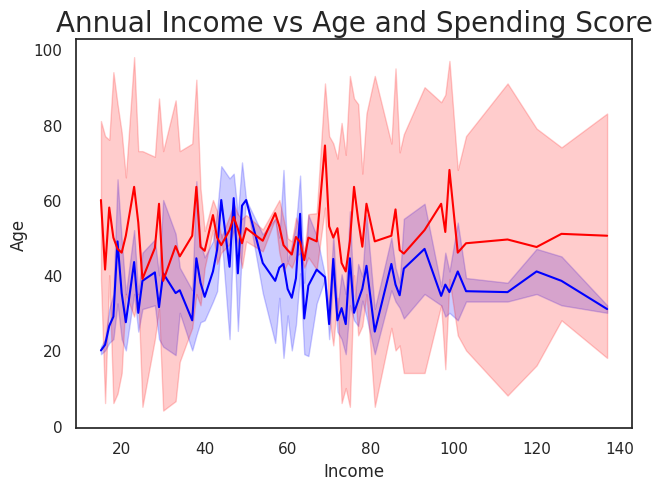

In [ ]:
x = dataset['Income']
y = dataset['Age']
z = dataset['Score']

data_for_lineplot_xy = pd.DataFrame({'Income': x, 'Age': y})
data_for_lineplot_xz = pd.DataFrame({'Income': x, 'Score': z})

# Plot the lineplots using the DataFrames
sns.lineplot(x='Income', y='Age', data=data_for_lineplot_xy, color='blue')
sns.lineplot(x='Income', y='Score', data=data_for_lineplot_xz, color='red')

plt.title('Annual Income vs Age and Spending Score', fontsize=20)
plt.show()

Pair Plot Visualization

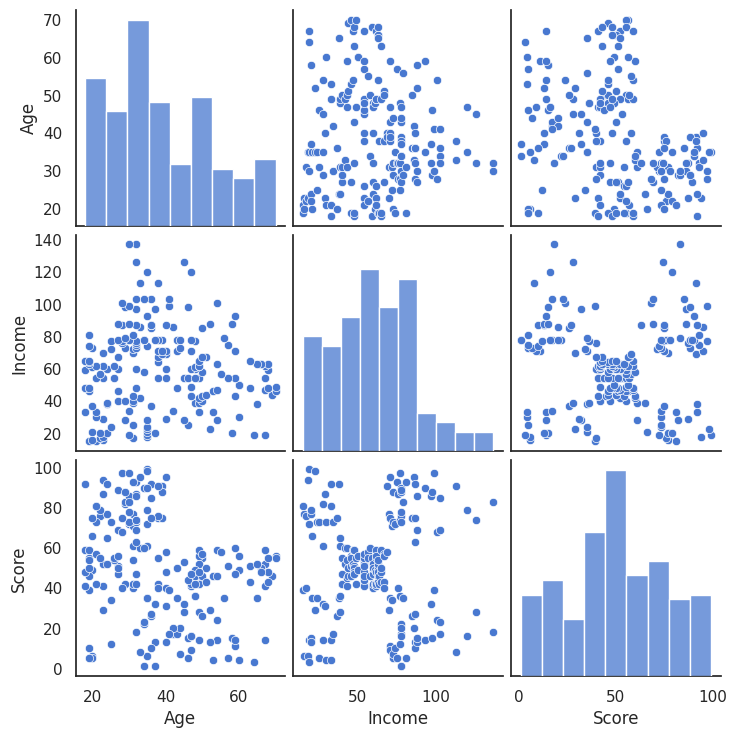

In [ ]:
sns.pairplot(dataset[['Age','Income','Score']])
plt.show()

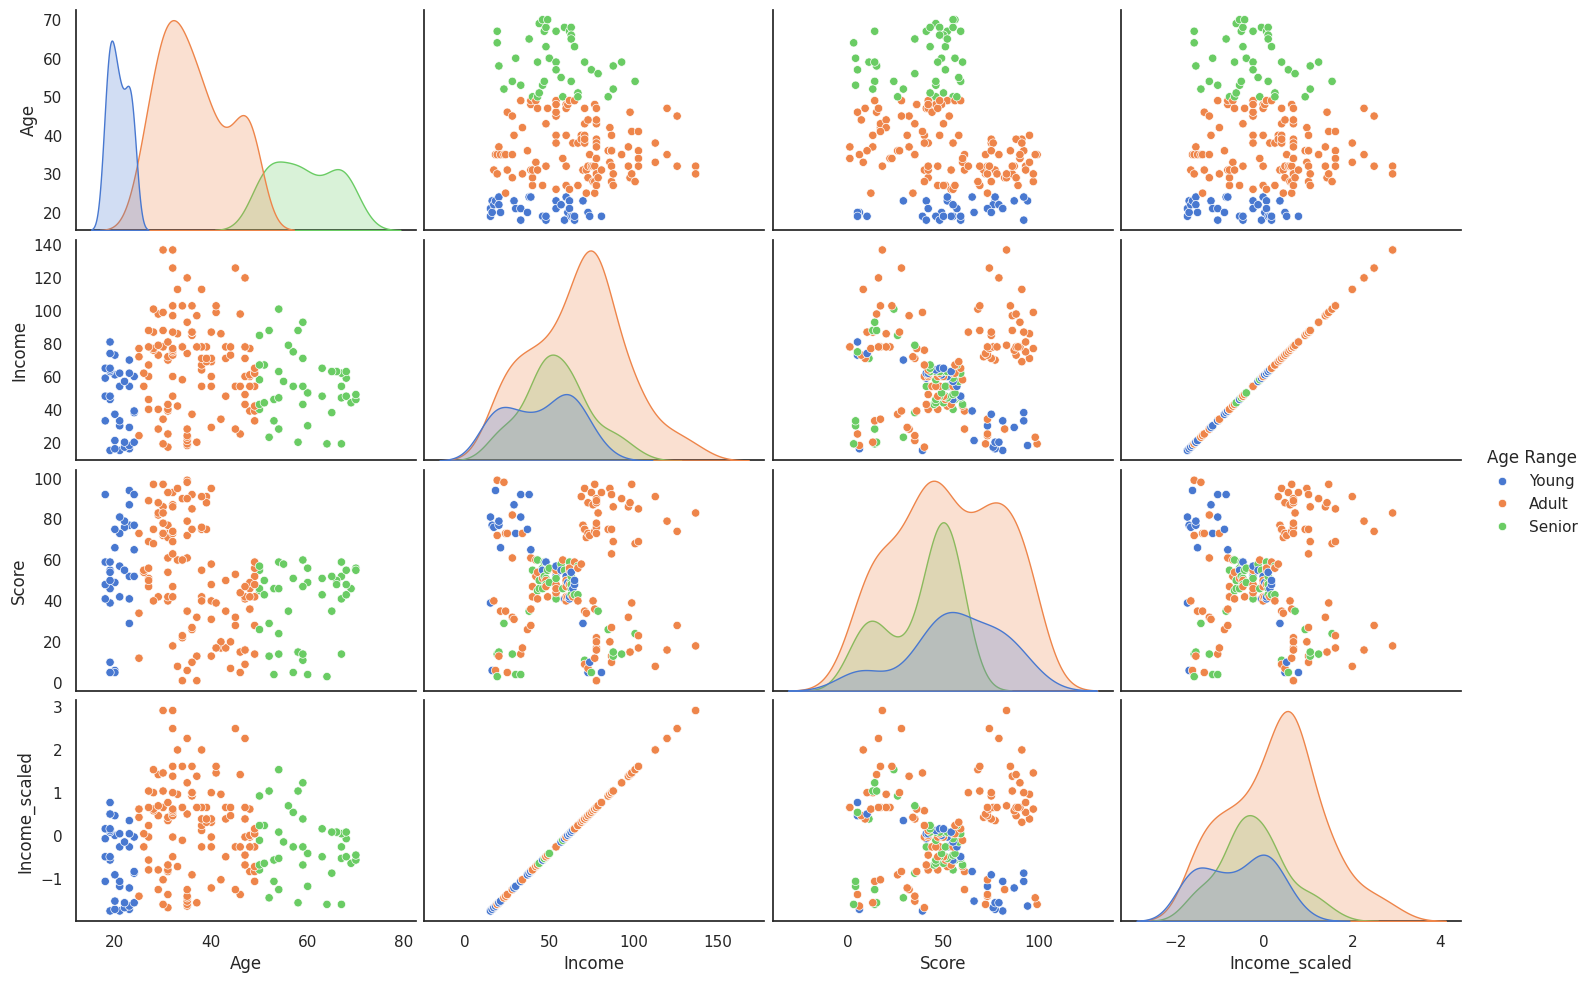

In [ ]:
# Let's see our data in a detailed way with pairplot
X = dataset.drop( ['Gender'], axis=1)
sns.pairplot(dataset.drop('Gender',axis=1),hue='Age Range', aspect=1.5)
plt.show()

In [ ]:
#From the above plot we see that gender has no direct relation to segmenting customers.
#That's why we can drop it and move on with other features which is why we will X parameter from now on.

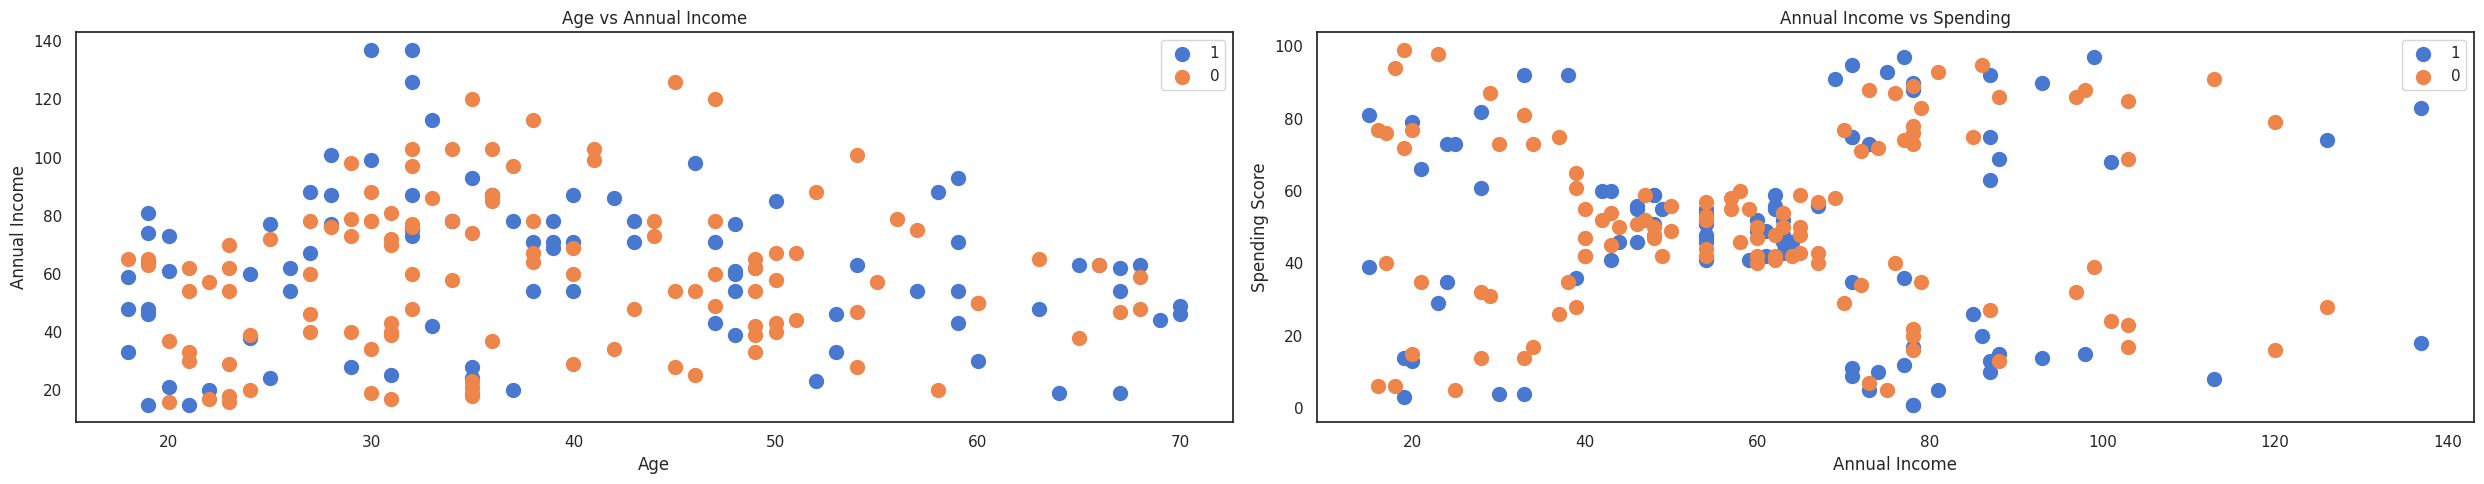

In [ ]:
plt.figure(figsize=(25, 5))

# Plot 1: Age vs Annual Income
plt.subplot(1, 2, 1)
for gender in dataset['Gender'].unique():
    plt.scatter(x='Age', y='Income', data=dataset[dataset['Gender'] == gender], label=gender, s=100)
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend()

# Plot 2: Annual Income vs Spending
plt.subplot(1, 2, 2)
for gender in dataset['Gender'].unique():
    plt.scatter(x='Income', y='Score', data=dataset[dataset['Gender'] == gender], s=100, label=gender)
plt.title('Annual Income vs Spending')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

plt.tight_layout()
plt.show()

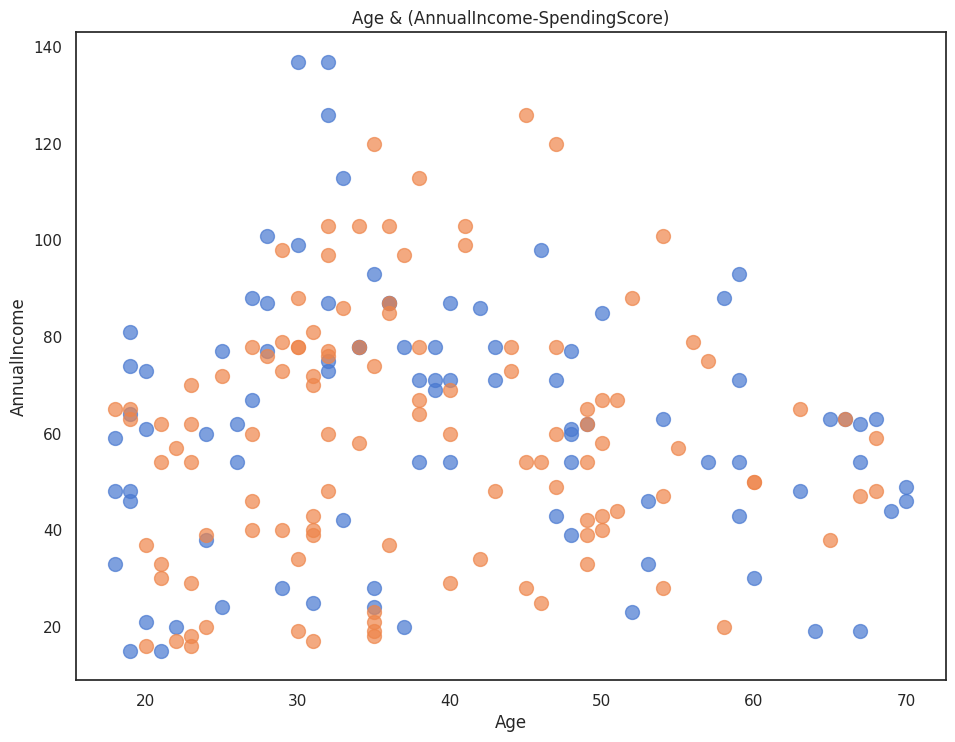

In [ ]:
plt.figure(figsize=(10,8))
for gender in dataset.Gender.unique():
    plt.scatter(x='Age',y='Income',data=dataset[dataset['Gender']==gender],s=100,alpha=.7)
    plt.xlabel('Age')
    plt.ylabel('AnnualIncome')
    plt.title('Age & (AnnualIncome-SpendingScore)')
plt.show()

Spending Score Based on Age

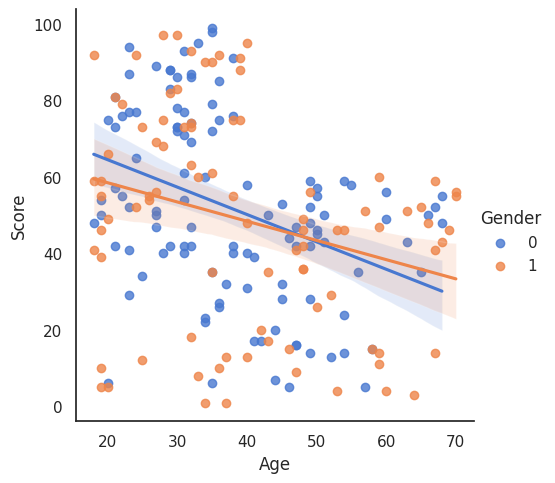

In [ ]:
sns.lmplot(x='Age', y='Score', data=dataset,fit_reg=True,hue='Gender')
plt.show()

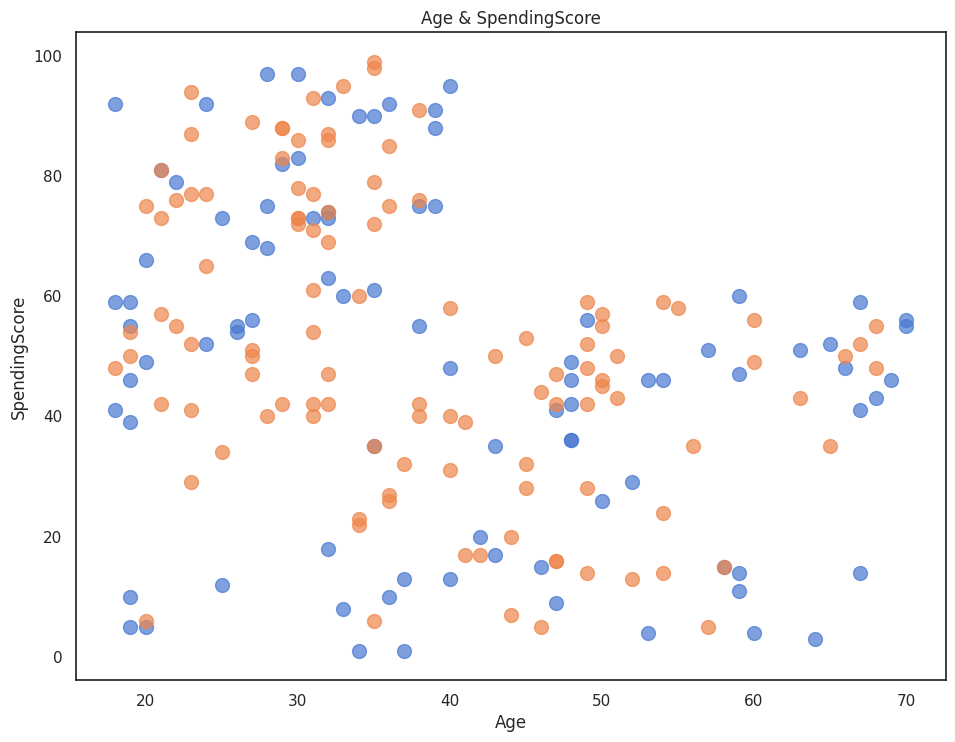

In [ ]:
plt.figure(figsize=(10,8))
for gender in dataset.Gender.unique():
    plt.scatter(x='Age',y='Score',data=dataset[dataset['Gender']==gender],s=100,alpha=.7)
    plt.xlabel('Age')
    plt.ylabel('SpendingScore')
    plt.title('Age & SpendingScore')
plt.show()

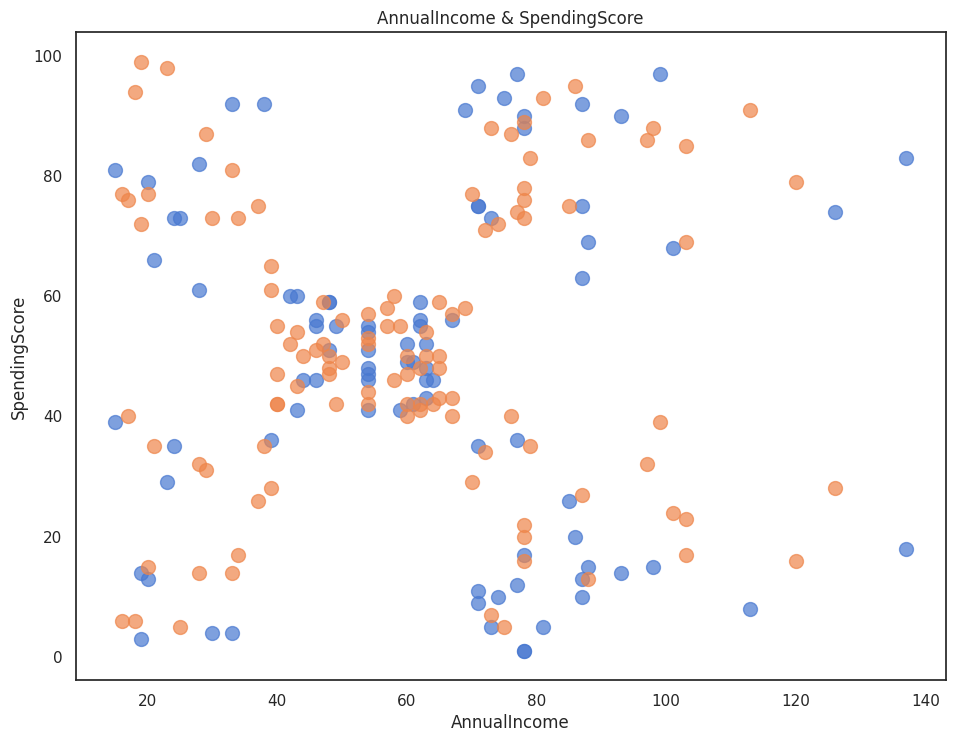

In [ ]:
plt.figure(figsize=(10,8))
for gender in dataset.Gender.unique():
    plt.scatter(x='Income',y='Score',data=dataset[dataset['Gender']==gender],s=100,alpha=.7)
    plt.xlabel('AnnualIncome')
    plt.ylabel('SpendingScore')
    plt.title('AnnualIncome & SpendingScore')
plt.show()

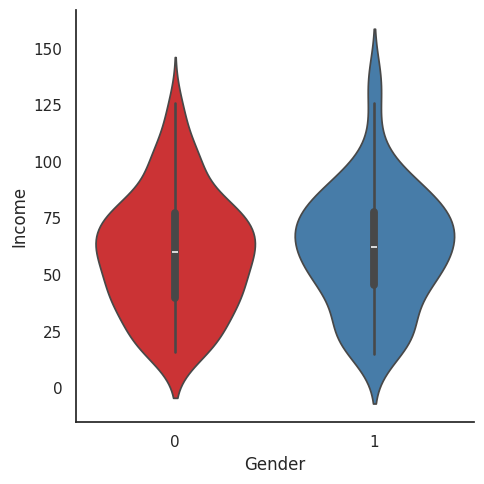

In [ ]:
sns.catplot(x="Gender", y="Income", kind='violin', data=dataset, palette="Set1")
plt.show()

In [ ]:
!pip install scikit-learn


from sklearn.decomposition import PCA

X_numerical = X.drop(columns=['Age Range'])
pca = PCA().fit(X_numerical)
print(pca.explained_variance_ratio_)
print()
print(X_numerical.columns.values.tolist())
print(pca.components_)

[4.51197786e-01 4.41109329e-01 1.07692885e-01 9.29458958e-19]

['Age', 'Income', 'Score', 'Income_scaled']
[[-1.84867312e-01  6.12695749e-01  7.68037160e-01  2.33862470e-02]
 [ 1.36700977e-01  7.89378753e-01 -5.97734223e-01  3.01301364e-02]
 [ 9.73209597e-01  5.50607945e-03  2.29853691e-01  2.10163909e-04]
 [ 1.67298266e-17 -3.81416549e-02 -6.93889390e-18  9.99272342e-01]]


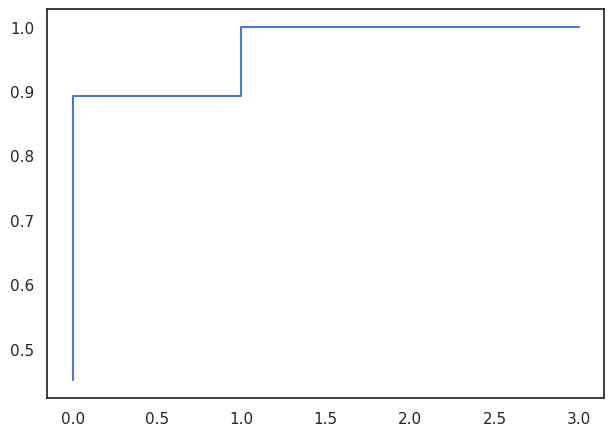

In [ ]:
cumulative=np.cumsum(pca.explained_variance_ratio_)
plt.step([i for i in range(len(cumulative))],cumulative)
plt.show()

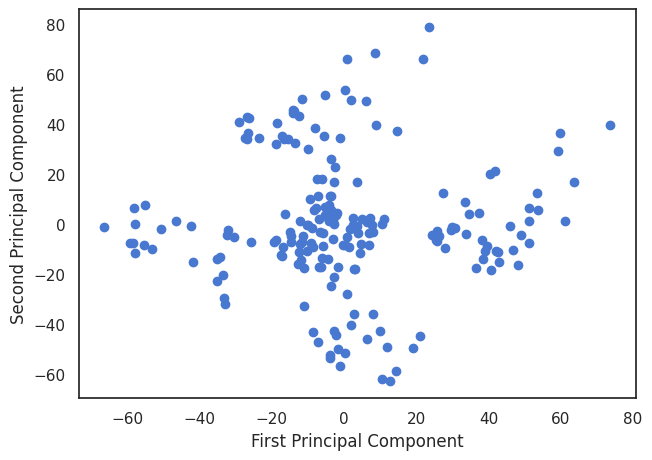

In [ ]:
# Drop the 'Age Range' column before fitting PCA
X_numerical = X.drop(columns=['Age Range'])
pca = PCA(n_components=2)
pca.fit(X_numerical)
reduced_data = pca.transform(X_numerical)
inverse_data = pca.inverse_transform(reduced_data)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [ ]:
reduced_data=pd.DataFrame(reduced_data,columns=['Dim1','Dim2'])
reduced_data[:10]

,Dim1,Dim2
0,-32.887487,-32.035383
1,-0.999661,-56.866819
2,-57.803992,-11.382924
3,-3.827956,-53.411951
4,-33.110681,-29.411648
5,-3.797537,-52.160389
6,-59.349825,-7.751352
7,10.455853,-61.992375
8,-66.401500,-1.203292
9,-7.121448,-47.094787


Model Building Process

In [ ]:
dataset_1 = dataset.iloc[:,2:5]
dataset_1.head(3)

,Income,Score,Age Range
0,15,39,Young
1,15,81,Young
2,16,6,Young


Using Elbow method to find the Optimal Cluster Number

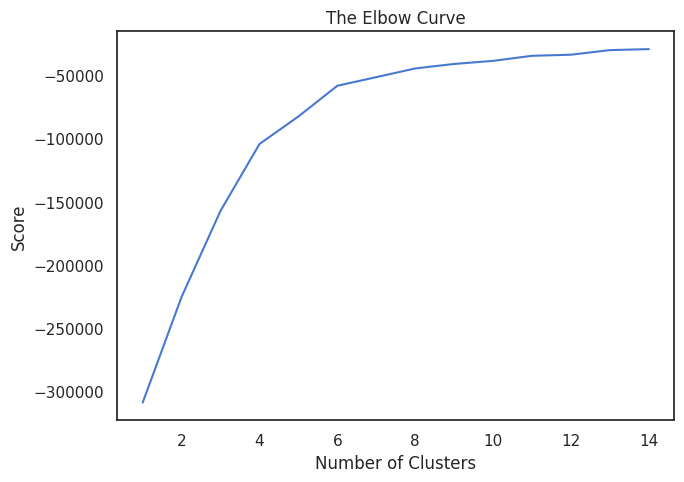

In [ ]:
dataset_1 = dataset[['Income', 'Score', 'Age']] # Select only numerical columns for clustering
results = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    res = kmeans.fit(dataset_1)
    results.append(res.score(dataset_1))
plt.plot(range(1,15),results)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('The Elbow Curve')
plt.show()

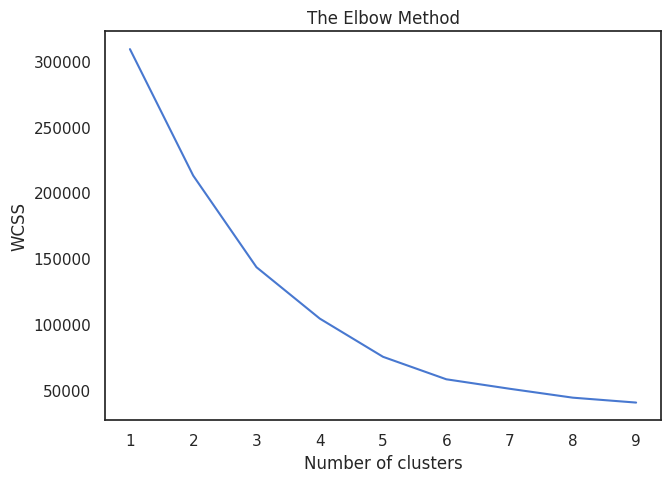

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(dataset_1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

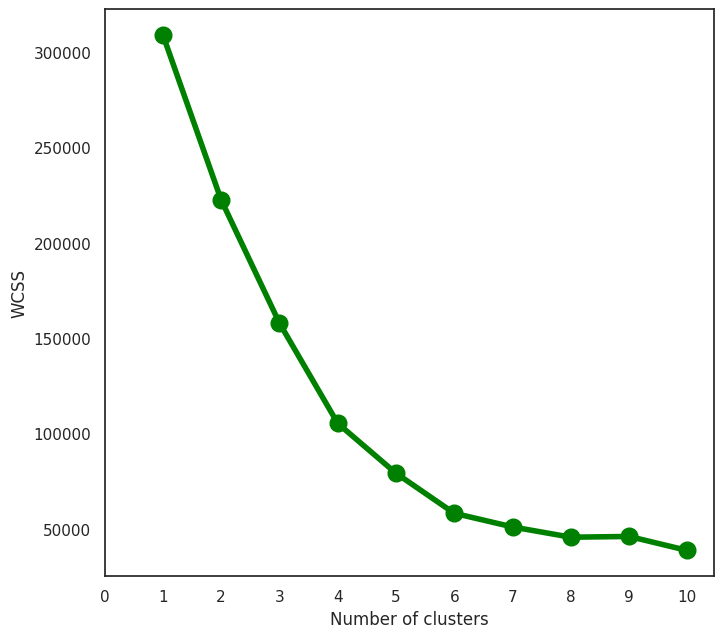

In [ ]:
# find the optimal number of clusters using elbow method

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(dataset_1)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

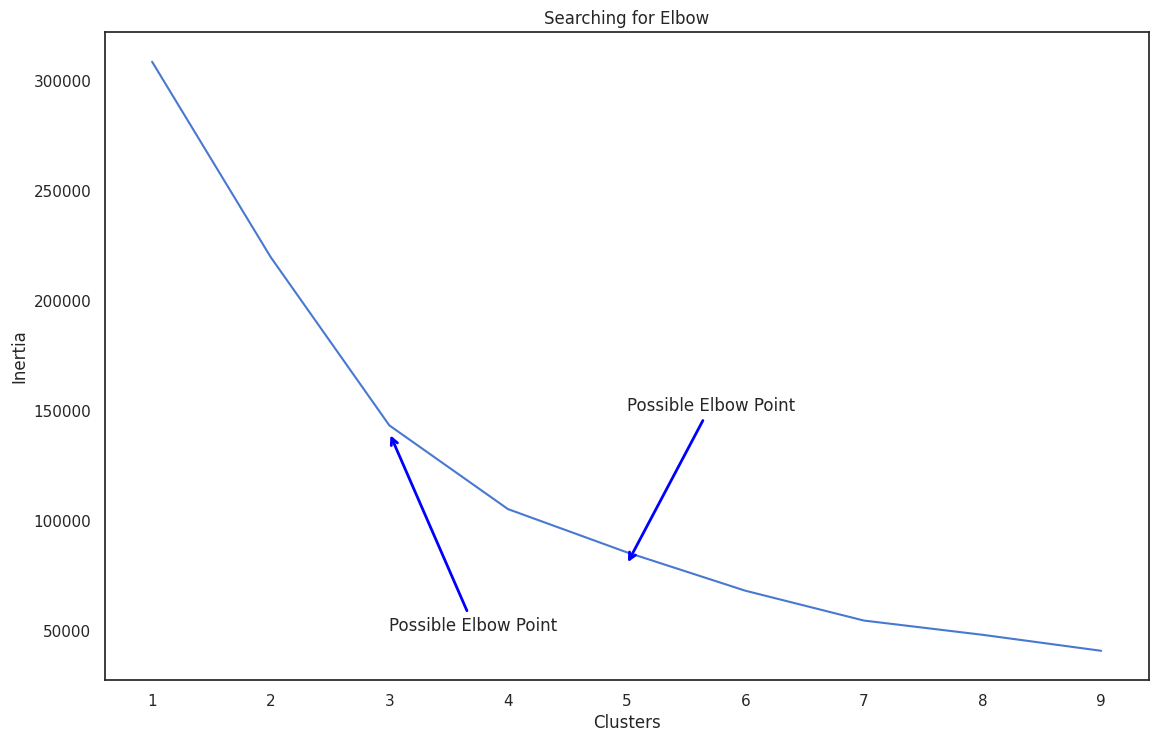

In [ ]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 10):
    km = KMeans(n_clusters=i).fit(dataset_1)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
;
ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

In [ ]:
dataset_1 = dataset.iloc[:,2:5]

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

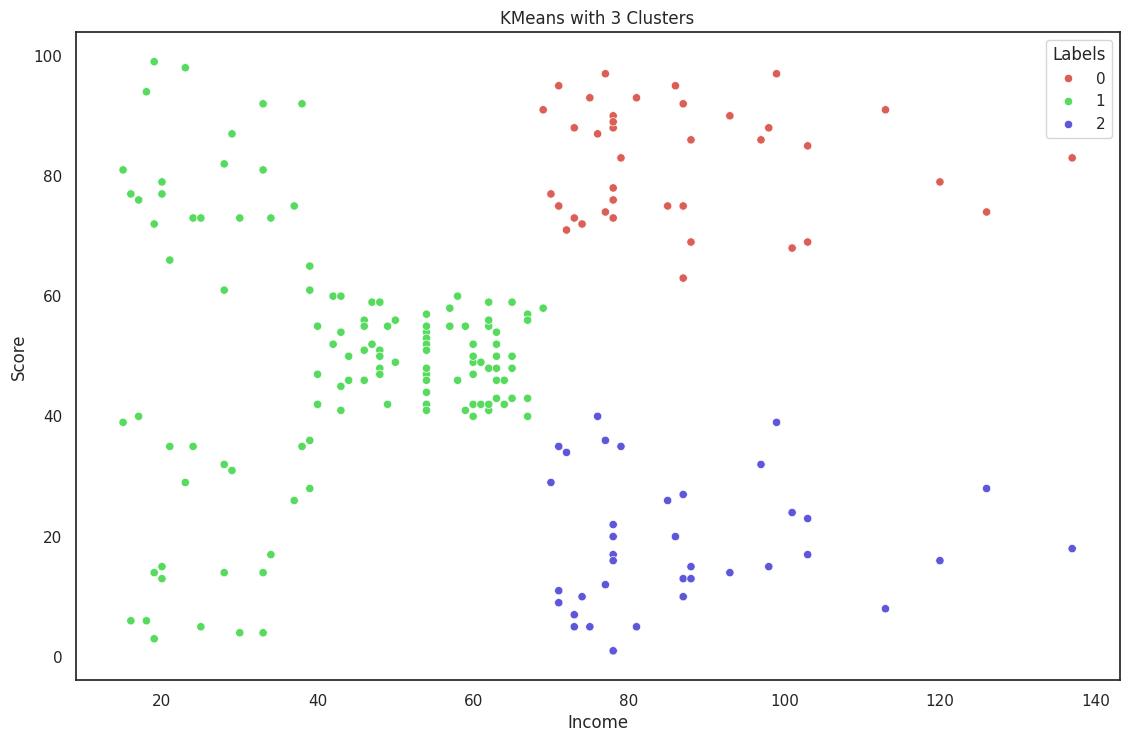

In [ ]:
# 3 cluster
km3 = KMeans(n_clusters=3).fit(dataset[['Income', 'Score', 'Age']]) # Select only numerical features

dataset['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income', y='Score', hue='Labels', data=dataset,
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

<Figure size 1200x800 with 0 Axes>

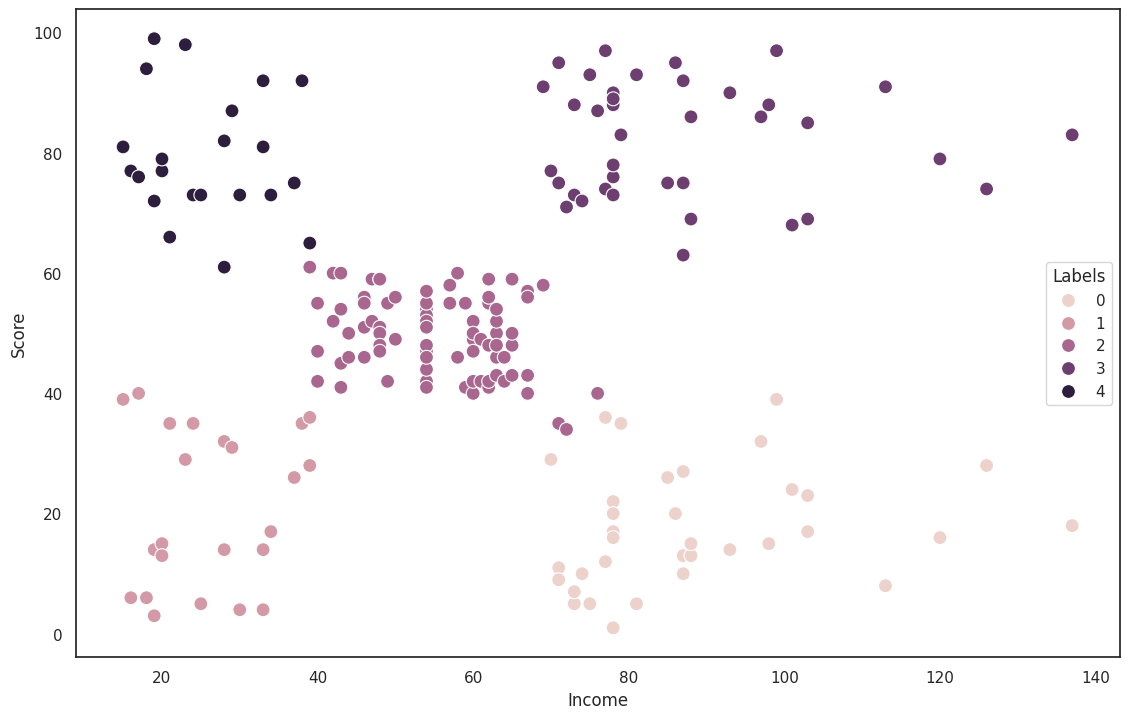

In [ ]:
#with 5 Clusters
km5 = KMeans(n_clusters=5).fit(dataset_1[['Income', 'Score']])


km5 = KMeans(n_clusters=5).fit(dataset_1[['Income', 'Score']])

dataset_1['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))

sns.scatterplot(x=dataset_1['Income'], y=dataset_1['Score'], hue=dataset_1['Labels'], s=100)
plt.show()

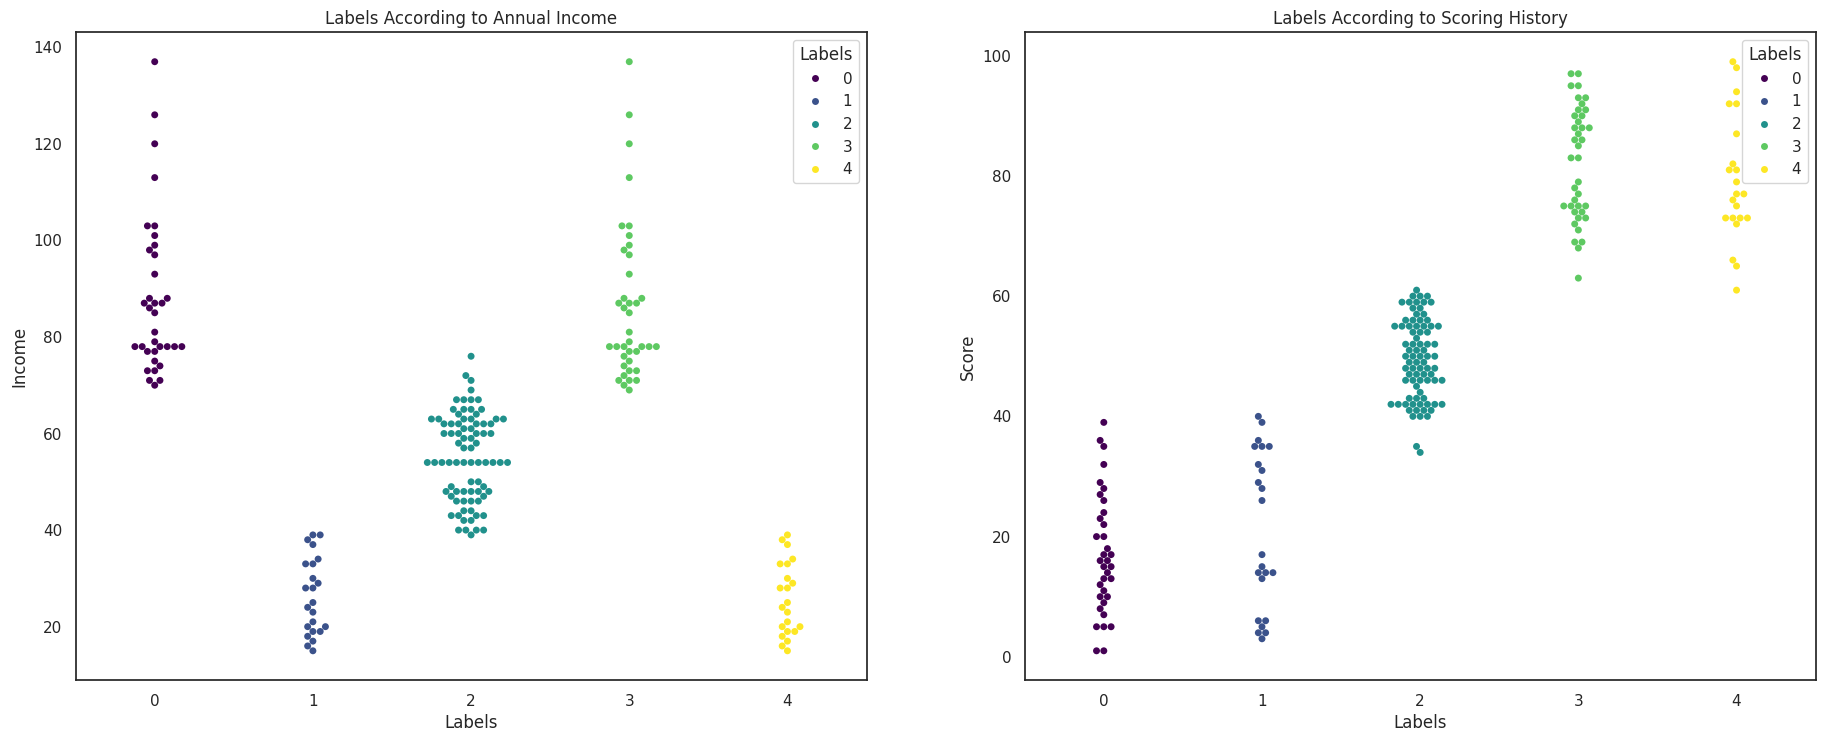

In [ ]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Income', data=dataset_1, ax=ax, hue='Labels', palette='viridis')
ax.set_title('Labels According to Annual Income')


ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Score', data=dataset_1, ax=ax, hue='Labels', palette='viridis')
ax.set_title('Labels According to Scoring History')

plt.show()

Hierarchical Clustering

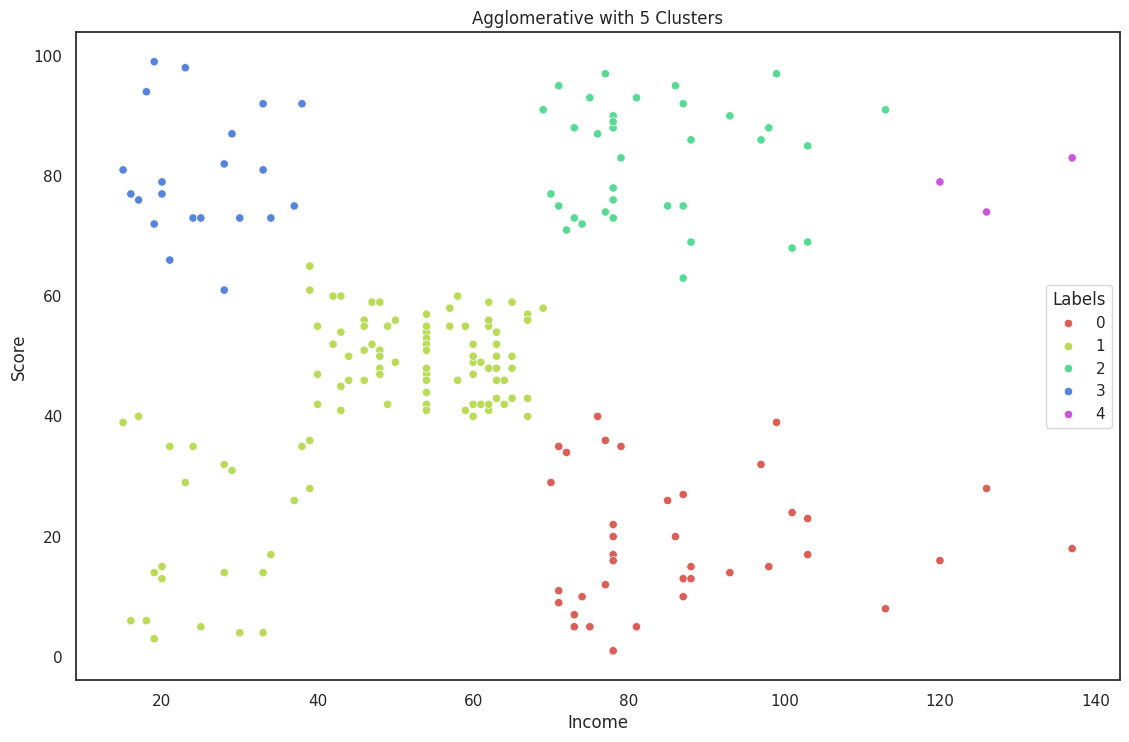

In [ ]:
from sklearn.cluster import AgglomerativeClustering


dataset_2 = dataset[['Income', 'Score']]

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(dataset_2)

dataset_2['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income', y='Score', hue='Labels', data=dataset_2,
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters')
plt.show()

DBSCAN (Density Based Clustering) Clustering

<Figure size 1200x800 with 0 Axes>

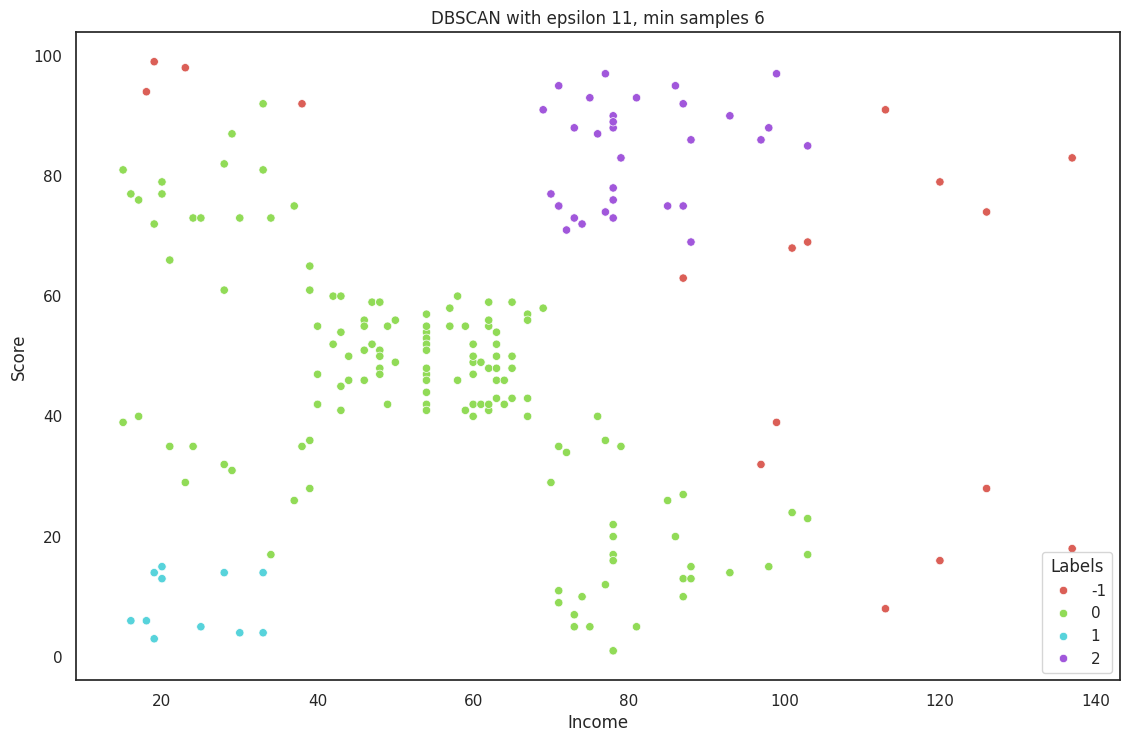

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=11, min_samples=6).fit(dataset_2)

dataset_2['Labels'] = db.labels_
plt.figure(figsize=(12, 8))

sns.scatterplot(x=dataset_2['Income'], y=dataset_2['Score'], hue=dataset_2['Labels'],
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

Visualizing All the ALgorithms to Check their Clustering Distributions

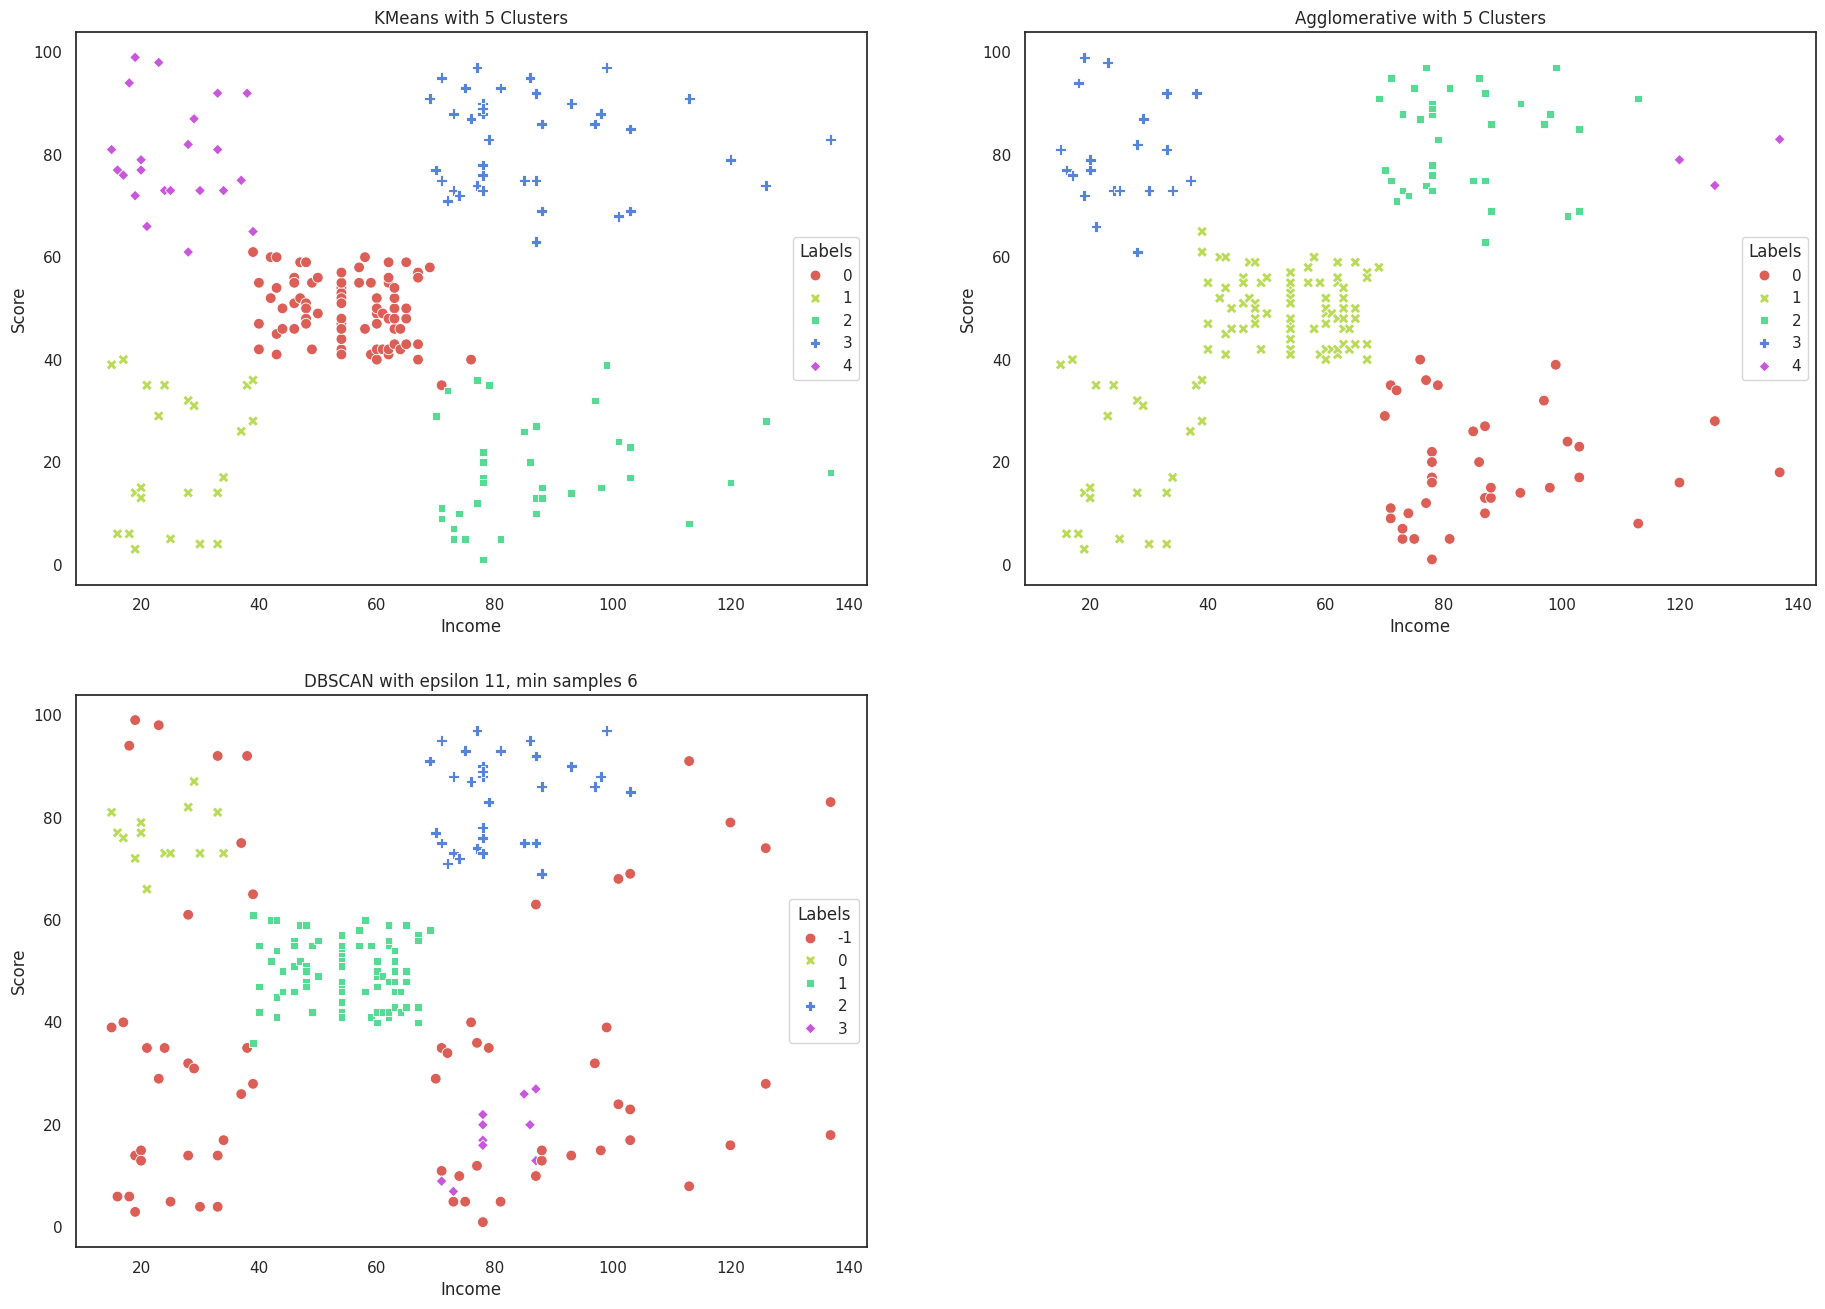

In [ ]:
fig = plt.figure(figsize=(20,15))

##---> KMeans
ax = fig.add_subplot(221)

km5 = KMeans(n_clusters=5).fit(dataset_2)
dataset_2['Labels'] = km5.labels_

sns.scatterplot(x=X['Income'], y=dataset_2['Score'], hue=dataset_2['Labels'], style=dataset_2['Labels'],
                palette=sns.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('KMeans with 5 Clusters')


##---> Agglomerative
ax = fig.add_subplot(222)

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(dataset_2)
dataset_2['Labels'] = agglom.labels_

sns.scatterplot(x=dataset_2['Income'], y=dataset_2['Score'], hue=dataset_2['Labels'], style=dataset_2['Labels'],
                palette=sns.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('Agglomerative with 5 Clusters')


##---> DBSCAN
ax = fig.add_subplot(223)

X_numerical = X[['Age', 'Income', 'Score']]

db = DBSCAN(eps=11, min_samples=6).fit(X_numerical)
X['Labels'] = db.labels_

sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], style=X['Labels'], s=60,
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]), ax=ax)
ax.set_title('DBSCAN with epsilon 11, min samples 6')

plt.show()